In [9]:
import matplotlib.pyplot as plt
from pyspark import SparkContext
print(sc)

<SparkContext master=local[*] appName=PySparkShell>


In [10]:
temperatura = sc.parallelize([(1999,-20),(2000, 1),(2001,-2),(2002,-19),(2003, 20) ,(2004, 25), (2005, -30)])
frio = temperatura.filter(lambda x: x[1] < 0).collect()
print(frio)

[(1999, -20), (2001, -2), (2002, -19), (2005, -30)]


In [11]:
alta = temperatura.top(3, key=lambda x: x[1] < 0 )
print(alta)

[(1999, -20), (2001, -2), (2002, -19)]


In [12]:
baja = temperatura.takeOrdered(3, key=lambda x: x[1])
print(baja)

[(2005, -30), (1999, -20), (2002, -19)]


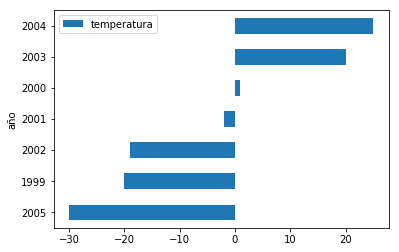

In [16]:
orden = temperatura.sortBy(lambda a: a[1]).collect()
df = sqlContext.createDataFrame(orden, ['año', 'temperatura'])
dataframe = df.toPandas().plot(kind='barh', x='año', y='temperatura')

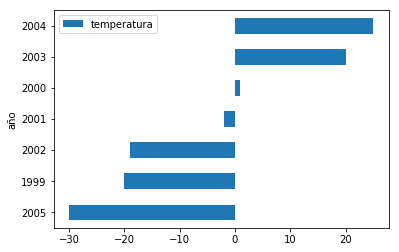